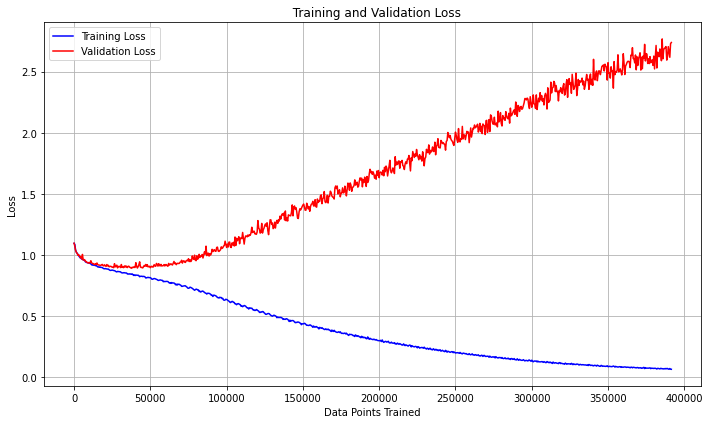

In [1]:
import numpy as np
import matplotlib.pyplot as plt
foldername = 'logs/comparison-roberta-full/'
expname = 'comparison-roberta-full-'
filename1 = 'trainloss'
filename2 = 'validationloss'
def moving_average(data, window_size):
    """Compute the moving average of a list or array."""
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

# Load the loss data from the npy files
train_loss = np.load(foldername+filename1+'.npy')
validation_loss = np.load(foldername+filename2+'.npy')

# Smooth the loss data using a moving average
window_size = 1  # Choose a window size that gives the desired smoothness
smooth_train_loss = moving_average(train_loss, window_size)
smooth_validation_loss = moving_average(validation_loss, window_size)

# Create the x-axis values
x_values = np.arange(len(smooth_train_loss)) * 500 + (window_size // 2) * 500  # adjust for moving average shift

# Plot the   losses
plt.figure(figsize=(10, 6))
plt.plot(x_values, smooth_train_loss, label='Training Loss', color='blue')
plt.plot(x_values, smooth_validation_loss[1:], label='Validation Loss', color='red')
plt.xlabel('Data Points Trained')
plt.ylabel('Loss')
plt.title('  Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(foldername +expname+filename1+filename2 +'_plot')
plt.show()


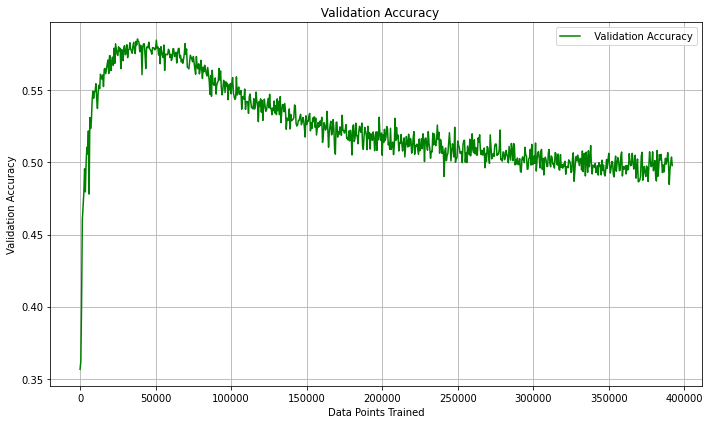

In [2]:
import numpy as np
import matplotlib.pyplot as plt
filename = 'validationacc'
def moving_average(data, window_size):
    """Compute the moving average of a list or array."""
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

# Load the accuracy data from the npy file
validation_acc = np.load(foldername+filename+'.npy')

# Smooth the accuracy data using a moving average
window_size = 1
smooth_validation_acc = moving_average(validation_acc, window_size)

# Create the x-axis values
x_values = np.arange(len(smooth_validation_acc)) * 500 + (window_size // 2) * 500  # adjust for moving average shift

# Plot the   accuracy
plt.figure(figsize=(10, 6))
plt.plot(x_values, smooth_validation_acc, label='  Validation Accuracy', color='green')
plt.xlabel('Data Points Trained')
plt.ylabel('Validation Accuracy')
plt.title('  Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(foldername +expname+filename +'_plot')
plt.show()


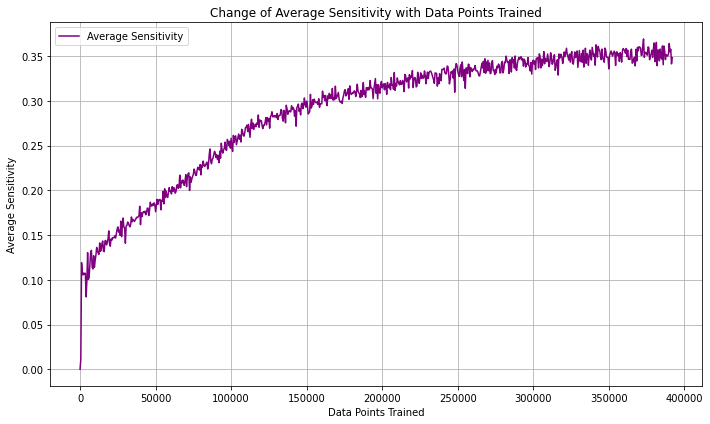

In [7]:
import numpy as np
import matplotlib.pyplot as plt
filename = 'sensitivity'
def moving_average(data, window_size):
    """Compute the moving average of a list or array."""
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

# Load the sensitivity data
sensitivity_data = np.load(foldername+filename+'.npy')

# Compute the average sensitivity for each sentence (list)
average_sensitivity = np.mean(sensitivity_data, axis=1)

# Smooth the average sensitivity data using a moving average
window_size = 1
average_sensitivity = moving_average(average_sensitivity, window_size)

# Create the x-axis values. Adjusting for the moving average shift
x_values = np.arange(len(average_sensitivity)) * 500 + (window_size // 2) * 500

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, average_sensitivity, label='Average Sensitivity', color='purple')
plt.xlabel('Data Points Trained')
plt.ylabel('Average Sensitivity')
plt.title('Change of Average Sensitivity with Data Points Trained')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(foldername +expname+filename +'_plot')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the sensitivity data
sensitivity_data = np.load('G:\\GitCode\\USC-SB-Transformer\\logs\\sensitivity_10_57_19_10_2023.npy')

# Compute the average sensitivity for each position across the lists
average_sensitivity_per_sentence = np.mean(sensitivity_data[10:], axis=0)

# Compute the standard deviation (square root of variance) for each position across the lists
# We use standard deviation for error bars as it's a more common representation of data spread around the mean.
std_dev_per_sentence = np.sqrt(np.var(sensitivity_data, axis=0))

# Create the x-axis values (representing each sentence)
x_values = np.arange(len(average_sensitivity_per_sentence))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart for Average Sensitivity with error bars
ax.bar(x_values, average_sensitivity_per_sentence, color='purple', edgecolor='black', 
       yerr=std_dev_per_sentence, capsize=5, label='Average Sensitivity')

ax.set_xlabel('Sentences')
ax.set_ylabel('Average Sensitivity')
ax.grid(axis='y')
ax.set_title('Average Sensitivity for Each Sentence with Variance as Error Bars')
ax.legend()

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'G:\\GitCode\\USC-SB-Transformer\\logs\\sensitivity_10_57_19_10_2023.npy'